# SC4172 Project - Correlation Power Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn
import scipy
import random
from scipy.stats import pearsonr
import matplotlib.pyplot as plot

c:\Users\yeohw\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Prerequisite Functions 


In [3]:
# AES S-box
Sbox = [
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
]

In [4]:
# We set the number of traces to be used to be 100
no_of_traces = 100

# Code for calculating the hamming weight of the Sbox output
def hw(int_no):
    # Write Code to calculate the number of ones in a byte...
    c = 0
    while(int_no):
        int_no &= (int_no - 1)
        c += 1
    return c

## Data Preparation

In [5]:
# Prior to reading the CSV file, the CSV file is slightly editted
# 1) Add a row to the top
# 2) Remove any samples below index 100. This ensure that we work with only 100 samples

# Read the CSV file
df = pd.read_csv("waveform.csv")

df

,Plaintext,Ciphertext,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 2492,Unnamed: 2493,Unnamed: 2494,Unnamed: 2495,Unnamed: 2496,Unnamed: 2497,Unnamed: 2498,Unnamed: 2499,Unnamed: 2500,Unnamed: 2501
0,F22E10CA18045B15EC056215AF1E2FEE,6C4A1DE1148387B5645308323C59B7D6,0.478,0.456,0.416,0.436,0.398,0.380,0.422,0.482,...,0.402,0.362,0.358,0.404,0.400,0.370,0.398,0.360,0.352,0.416
1,00A51770A9A1269514B004D1A17489BF,BFE9B87BBB844AAE58765079F672CD61,0.460,0.470,0.444,0.464,0.430,0.386,0.422,0.460,...,0.406,0.374,0.348,0.408,0.400,0.364,0.400,0.370,0.350,0.394
2,7A3B778B2CE9AC3DFFBA500F84868DE7,8E6B3D1DF403BF01CEFCAD50DD34173C,0.438,0.446,0.414,0.450,0.402,0.372,0.416,0.456,...,0.410,0.380,0.354,0.396,0.398,0.368,0.410,0.378,0.354,0.396
3,463015576F33A2BCBC991B6D37C9AFBF,E1F96AB155DC977F7DA27E1E461E2613,0.484,0.458,0.430,0.434,0.410,0.380,0.434,0.458,...,0.394,0.356,0.358,0.394,0.392,0.376,0.384,0.372,0.342,0.430
4,0F0165AA74B57F97E8A11F802732AAF9,45208B01DF3A6D9E42E0156BFC08EC24,0.472,0.470,0.444,0.456,0.406,0.396,0.426,0.450,...,0.404,0.380,0.344,0.392,0.390,0.372,0.414,0.368,0.346,0.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,034177FD2F54E8B44D2928209F68CC3F,9F5C7CF2753E403CC7876511163A7C9C,0.442,0.430,0.400,0.432,0.392,0.366,0.408,0.460,...,0.406,0.350,0.362,0.392,0.392,0.344,0.394,0.366,0.342,0.406
96,876B10FCA9BCD6EB7C8D8F8B8DE469E2,67A99EACFB8796DE11082EC35C80BC4B,0.494,0.464,0.436,0.450,0.428,0.384,0.430,0.472,...,0.392,0.366,0.354,0.404,0.386,0.366,0.388,0.372,0.346,0.422
97,0B96A9FB2324C321ABF2F5F67B600584,947EF54A3D15A33A7FB35F1C68417B93,0.440,0.464,0.440,0.458,0.428,0.390,0.416,0.458,...,0.406,0.364,0.346,0.400,0.384,0.374,0.392,0.362,0.346,0.372
98,4A1A8BA61372C2B3DDB3BDB866EF438F,79FEC2829DEDF9D5BFDACB5E6A323367,0.476,0.454,0.428,0.436,0.416,0.378,0.426,0.486,...,0.386,0.362,0.356,0.394,0.384,0.366,0.392,0.358,0.338,0.398


In [6]:
# Extract the contents of the Plaintext and append them to an array
data_arr = df["Plaintext"].to_numpy()

len(data_arr)
data_arr[0]

'F22E10CA18045B15EC056215AF1E2FEE'

In [7]:
# Extract the first byte of the plaintext into an array
first_bytes = []
for i in range(0, len(data_arr)):
    first_bytes.append(int(data_arr[i][:2], 16))

print(f"First Byte of the first Plaintext: {first_bytes[0]}  / {hex(first_bytes[0])}")

First Byte of the first Plaintext: 242  / 0xf2


## Testing basic functions

In [8]:
# As a sanity check, we will first set the key to 0x20
k = 0x20
leaky_sbox_output_value_array = []

#
for byte_pos in range(0,no_of_traces):
    byte_now = first_bytes[byte_pos] ^ k
    Sbox_output_leaky_value = Sbox[byte_now]
    leaky_sbox_output_value_array.append(Sbox_output_leaky_value)

# 0x20 XOR 0xF2 = 0xD2
# Looking at the sbox, the corresponding substituition for 0xD2 would be 0xB5 = 181
# We can check this output by printing out this first element
leaky_sbox_output_value_array[0]

181

In [9]:
# Caculate the Hamming Weight
hamming_weight_of_leaky_sbox_bytes = []

for byte in range(0,no_of_traces):
    hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))

#hamming_weight_of_leaky_sbox_bytes

In [10]:
# With the Sbox Substituition function and Hamming Weight Computation working, we then bruteforce all 256 combinations of the key
# This nets us a power matrix model

no_of_possible_values_of_key_byte = 256
power_model_matrix = [[]]*no_of_possible_values_of_key_byte

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    k = key_byte_guess

    leaky_sbox_output_value_array = []
    for byte_pos in range(0,no_of_traces):
        byte_now = first_bytes[byte_pos] ^ k
        Sbox_output_leaky_value = Sbox[byte_now]
        leaky_sbox_output_value_array.append(Sbox_output_leaky_value)

    hamming_weight_of_leaky_sbox_bytes = []
    for byte in range(0,no_of_traces):
        hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))

    power_model_matrix[key_byte_guess] = hamming_weight_of_leaky_sbox_bytes

#power_model_matrix[0]

## Computing Correlation Values for First Sample

In [11]:
# Extract the first sample of all 100 power traces
df["Unnamed: 2"]
test = df["Unnamed: {x}".format(x=str(2))].to_numpy()

test

array([0.478, 0.46 , 0.438, 0.484, 0.472, 0.48 , 0.46 , 0.484, 0.46 ,
       0.402, 0.476, 0.484, 0.484, 0.474, 0.476, 0.43 , 0.46 , 0.48 ,
       0.416, 0.438, 0.482, 0.43 , 0.466, 0.41 , 0.462, 0.486, 0.464,
       0.482, 0.436, 0.43 , 0.468, 0.48 , 0.468, 0.402, 0.448, 0.48 ,
       0.434, 0.464, 0.442, 0.418, 0.444, 0.472, 0.414, 0.492, 0.41 ,
       0.468, 0.466, 0.416, 0.428, 0.46 , 0.42 , 0.444, 0.458, 0.44 ,
       0.42 , 0.462, 0.484, 0.426, 0.448, 0.476, 0.448, 0.446, 0.452,
       0.424, 0.454, 0.452, 0.482, 0.396, 0.452, 0.406, 0.448, 0.398,
       0.454, 0.46 , 0.438, 0.434, 0.474, 0.436, 0.432, 0.472, 0.474,
       0.474, 0.464, 0.47 , 0.454, 0.426, 0.466, 0.444, 0.456, 0.444,
       0.472, 0.47 , 0.456, 0.428, 0.454, 0.442, 0.494, 0.44 , 0.476,
       0.468])

No. of Traces: 100


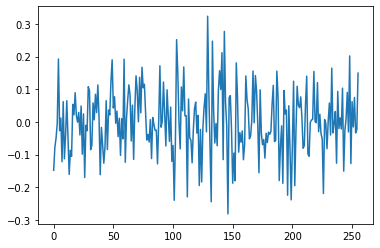

0.32335761228515586
-0.28180999381100935


In [12]:
# Compute the correlation values for this first sample and print the highest value

correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix[key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: 2"].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

# Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample

sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()

print(max(correlation_values))
print(min(correlation_values))

## Obtaining first byte of the key

In [13]:
# Compute the correlation values for all 2500 samples

correlation_matrix = []
correlation_values = []
power_trace_len = 2500

for power_trace_sample in range(0, power_trace_len):
    for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
        model_trace = power_model_matrix[key_byte_guess]
        corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + power_trace_sample))].to_numpy(), model_trace)
        correlation_values.append(corr_value[0])
    
    correlation_matrix.append(correlation_values)
    correlation_values = []



The correlation matrix has a size of 2500 by 256


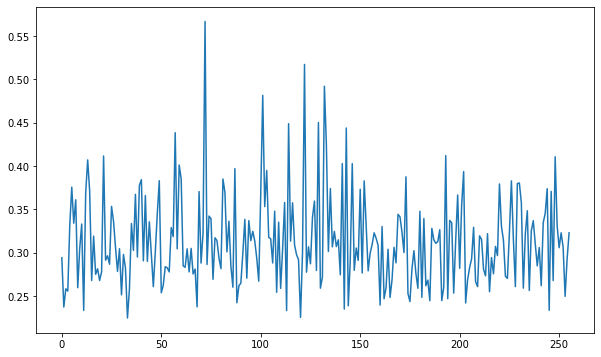

The highest correlation coefficient is 0.5669688354292596. The corresponding key is 0x48


In [14]:
print(f"The correlation matrix has a size of {len(correlation_matrix)} by {len(correlation_matrix[0])}")

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix[j][i]):
            max_val = np.abs(correlation_matrix[j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient is {np.abs(max_val2)}. The corresponding key is {hex(sample_with_highest_corr_coeff)}")

## Alternative method to extract the first byte of the key
- Find the highest correlation coefficient at each time instance
- Identify the time instance whereby the highest correlation coeffcient lies
- Identify the key that gave rise to the highest correlation coefficient

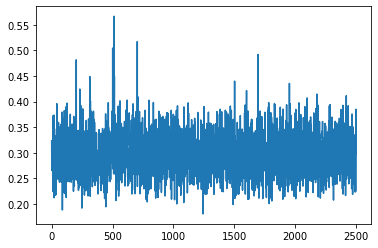

In [15]:
# Plot a graph to showcase the highest correlation values for each of the 2500 samples

highest_correlation_value= []

for i in range(0, 2500):
    highest_correlation_value.append(max(correlation_matrix[i]))

plot.figure(1)

x_index = []
for i in range(0,2500):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value)
plot.show()



In [16]:
# Obtain the time period with the highest correlation value

max_value = 0
sample_number = 0

for i in range(0, 2500):
    if max_value < max(np.abs(correlation_matrix[i])):
        max_value = max(np.abs(correlation_matrix[i]))
        sample_number = i


print(f"The highest correlation value is {max(correlation_matrix[sample_number])}, which is present at sample {sample_number}")

The highest correlation value is 0.5669688354292596, which is present at sample 513


No. of Traces: 100


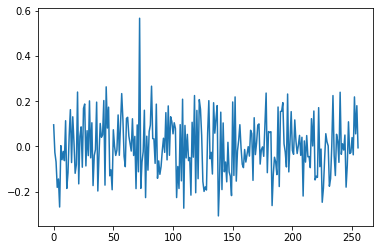

The highest correlation value is: 0.5669688354292596
The key value at which this occurs is at: 0x48


In [17]:

correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix[key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

# Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample

sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

In [18]:
print(f"Therefore, the first byte of the key is {hex(correlation_values.index(max(correlation_values)))}")

Therefore, the first byte of the key is 0x48
